<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1_imHIzjSUuoAAtS7VAauH-qEIkmosexT" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---
$Import$

---

In [ ]:
# Data
import pandas as pd 
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Feature Importance 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost
# Evaluation
from sklearn.metrics import f1_score,confusion_matrix

---
$DATA$

In [ ]:
df = pd.read_csv("stroke_data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Id is not important 
df.pop("id")

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

---
$Problems$ $:$
* Categorical Data
* Nan values (i.e. Empty Values)


In [ ]:
# Categorical Columns 
Cat_col = ["gender","ever_married","work_type","Residence_type","smoking_status"]
Le = LabelEncoder()
for i in Cat_col:
  df[i] = Le.fit_transform(df[i])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1



Yeah!!, Got rid of the Categorical Data. I think we should go for Feature Importance, it might help.

----

---
$Imputing$

---

In [ ]:
df.isnull().sum() # Checking the null values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

---
Can clearly see 200 NaN values there.. Ahh needa do imputing.

---

In [ ]:
SI = SimpleImputer()
df = SI.fit_transform(df)

In [ ]:
df = pd.DataFrame(df)
cols = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status ", "stroke"]
df.columns = cols
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.893237,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0


---
$Feature$ $Importnace$

In [ ]:
rfc = RandomForestClassifier().fit(df.iloc[:,:-1],df['stroke'])
importances = rfc.feature_importances_

In [ ]:
X_cols = cols[:-1]
for i,v in enumerate(X_cols):
  print(f"Feature : {X_cols[i]} \n Importance : {importances[i]}")

Feature : gender 
 Importance : 0.032703113320129415
Feature : age 
 Importance : 0.2283394055154762
Feature : hypertension 
 Importance : 0.024377526680732082
Feature : heart_disease 
 Importance : 0.02453466790959509
Feature : ever_married 
 Importance : 0.018547546726853617
Feature : work_type 
 Importance : 0.04952515135792543
Feature : Residence_type 
 Importance : 0.03331394303572572
Feature : avg_glucose_level 
 Importance : 0.28417920050346507
Feature : bmi 
 Importance : 0.23613297542180023
Feature : smoking_status  
 Importance : 0.06834646952829722


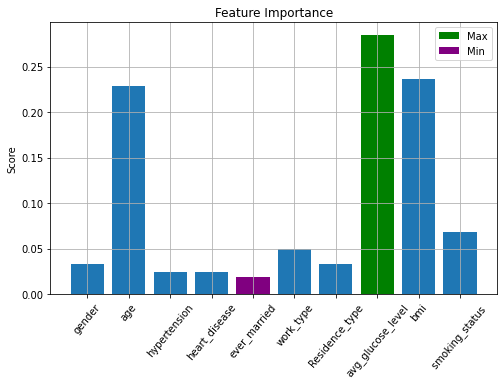

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(X_cols,importances)
max_ = np.array(np.where(importances==importances.max()))
min_ = np.array(np.where(importances==importances.min()))
plt.bar(X_cols[max_[0][0]],importances.max(),color="green",label="Max")
plt.bar(X_cols[min_[0][0]],importances.min(),color="purple",label="Min")
plt.grid()
plt.ylabel("Score")
plt.xticks(rotation=50)
plt.title("Feature Importance")
plt.legend()
plt.show()

---
Good News!! Marriage don't affect STROKES..haha (Joking)

But $Glucose$ $Level$ does, $Age$ with $BMI$ also plays a significant role.

If this would have been a big dataset, I would have removes low importance feature, but for now let's keep the data as it is.

---

---
$EDA$

---

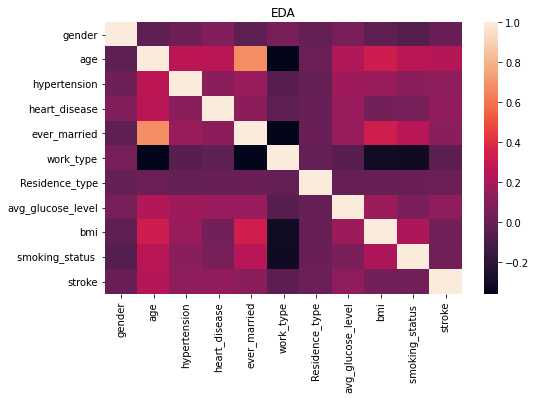

In [ ]:
plt.figure(figsize=(8,5))
Corr_ = df.corr()
sns.heatmap(Corr_)
plt.title("EDA")
plt.show()

---
Clearly, $Age$ and $Marriage$ have a high relation and this is true in reality.

$Spots :$

* `Hypertension` and `age` also have a good relation.
* `Heart Disease` and `age` also have a good relation.
* `Work Type` have good relations with `age`, `marriage`,`Smoking`.

Other than `smoking` it seems natural.


---

---
$Model$

In [ ]:
X_data,Y_data = df.iloc[:,:-1], df["stroke"]
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data)

In [ ]:
print(f"Class Distribution : {np.bincount(Y_train)}")

Class Distribution : [3644  188]


---
The imbalance is too high that even stratifying won't work here.

---

In [ ]:
# 1. Logistic Regression
Lr = LogisticRegression(C=1.0).fit(X_train,Y_train)
print(f"Accuracy : {Lr.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,Lr.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,Lr.predict(X_train))}")

Accuracy : 0.9522691705790297
F1 Score : 0.03092783505154639
CM 
 : [[3641    3]
 [ 185    3]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


---
Good Accuracy, but very bad F1 Score.

---

In [ ]:
# 2. KNN
KNN = KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train)
print(f"Accuracy : {KNN.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,KNN.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,KNN.predict(X_train))}")

Accuracy : 0.9491392801251957
F1 Score : 0.25116279069767444
CM 
 : [[3644    0]
 [ 161   27]]


---
Good Accuracy with good F1 Score.


---

In [ ]:
# 3. SVM(linear)
SVC_l = SVC(C=1.0,kernel="linear").fit(X_train,Y_train)
print(f"Accuracy : {SVC_l.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,SVC_l.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,SVC_l.predict(X_train))}")

Accuracy : 0.9522691705790297
F1 Score : 0.0
CM 
 : [[3644    0]
 [ 188    0]]


In [ ]:
# 4. SVM(rbf)
SVC_rbf = SVC(C=1.0,kernel="rbf").fit(X_train,Y_train)
print(f"Accuracy : {SVC_rbf.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,SVC_rbf.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,SVC_rbf.predict(X_train))}")

Accuracy : 0.9522691705790297
F1 Score : 0.0
CM 
 : [[3644    0]
 [ 188    0]]


In [ ]:
# 5. DTC
DTC = DecisionTreeClassifier(max_depth=10).fit(X_train,Y_train)
print(f"Accuracy : {DTC.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,DTC.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,DTC.predict(X_train))}")

Accuracy : 0.9264475743348983
F1 Score : 0.6360424028268552
CM 
 : [[3639    5]
 [  98   90]]


In [ ]:
# 6. RFC
RFC = RandomForestClassifier(n_estimators=50).fit(X_train,Y_train)
print(f"Accuracy : {RFC.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,RFC.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,RFC.predict(X_train))}")

Accuracy : 0.9499217527386542
F1 Score : 0.9973333333333333
CM 
 : [[3644    0]
 [   1  187]]


In [ ]:
# 7. AdaBoost
AdaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10)).fit(X_train,Y_train)
print(f"Accuracy : {AdaBoost.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,AdaBoost.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,AdaBoost.predict(X_train))}")

Accuracy : 0.9405320813771518
F1 Score : 1.0
CM 
 : [[3644    0]
 [   0  188]]


In [ ]:
# 8. Xgboost
Xg = xgboost.XGBClassifier(base_estimator=DecisionTreeClassifier(max_depth=10)).fit(X_train,Y_train)
print(f"Accuracy : {AdaBoost.score(X_test,Y_test)}")
print(f"F1 Score : {f1_score(Y_train,AdaBoost.predict(X_train))}")
print(f"CM \n : {confusion_matrix(Y_train,AdaBoost.predict(X_train))}")

Accuracy : 0.9405320813771518
F1 Score : 1.0
CM 
 : [[3644    0]
 [   0  188]]


---
Can do further optimization, But I guess $XGBoost$ will work fine. 

---